In [1]:
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


warnings.filterwarnings('ignore')

In [2]:
# Melihat dataset application_test

df_apptest = pd.read_csv('application_test.csv')
df_apptest

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
# Melihat dataset application_train

df_apptrain = pd.read_csv('application_train.csv')
df_apptrain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Melihat dataset bureau

df_bureau = pd.read_csv('bureau.csv')
df_bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [5]:
# Melihat dataset bureau_balance

df_bureauba = pd.read_csv('bureau_balance.csv')
df_bureauba

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [6]:
# Melihat dataset POS_CASH_balance

df_poscash = pd.read_csv('POS_CASH_balance.csv')
df_poscash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [7]:
# Melihat dataset credit_card_balance

df_ccbalance = pd.read_csv('credit_card_balance.csv')
df_ccbalance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [8]:
# Melihat dataset previous_application

df_previous_app = pd.read_csv('previous_application.csv')
df_previous_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [9]:
# Melihat dataset installments_payments

df_inspay = pd.read_csv('installments_payments.csv')
df_inspay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [10]:
# Melihat dataset sample_submission

df_HomeCredit = pd.read_csv('sample_submission.csv')
df_HomeCredit

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


# Data Exploration #

In [11]:
# Mengecek data train

print(f' Train set shape:{df_apptrain.shape}')
df_apptest.head()

 Train set shape:(307511, 122)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Mengecek tipe data pada data train

df_apptrain.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [13]:
# Mengecek kolom pada data train

df_apptrain.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [14]:
# Memilih tipe data object pada data train

df_apptrain.select_dtypes(include=['object']).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [15]:
# Mengecek statistik pada data train u/semua

df_apptrain.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [16]:
# Melihat ringkasan data pada data train dengan parameter verbose True dan null_counts True. 
# Verbose true fungsi akan mencetak informasi tambahan tentang kerangka data
# null_counts True fungsi akan mencetak jumlah nilai null di setiap kolom

df_apptrain.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [17]:
# Menjumlahkan semua data duplikat

df_apptrain.duplicated().sum()

0

In [18]:
# Mengecek data test

print(f' Train set shape:{df_apptest.shape}')
df_apptest.head()

 Train set shape:(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Mengecek tipe data pada data test

df_apptest.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [20]:
# Mengecek statistik pada data train u/semua

df_apptest.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [21]:
# Melihat nilai unique pada gender

df_apptrain['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

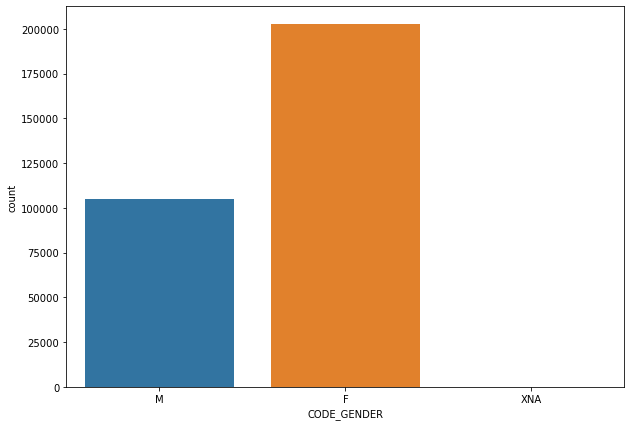

In [22]:
# berapa banyak orang yang melakukan peminjaman kredit? laki-laki atau perempuan?

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=df_apptrain)

In [23]:
# Menghitung jumlah male dan female yang melakukan pinjaman

df_apptrain['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

dilihat dari grafik batang dan data di atas, perempuan menjadi gender terbanyak yang melakukan peminjaman kredit

<AxesSubplot:xlabel='TARGET', ylabel='count'>

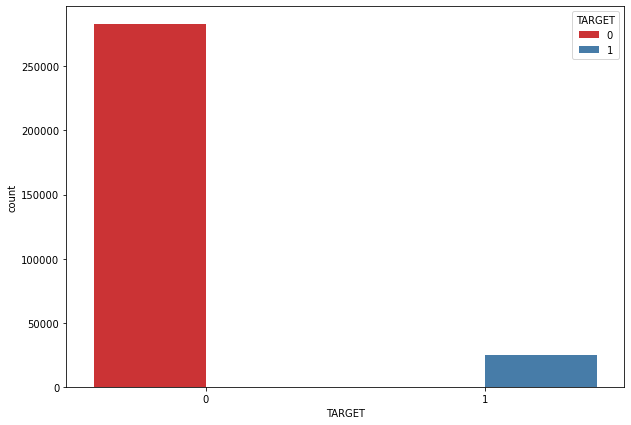

In [24]:
# berapa banyak orang yang berhasil membayar pinjaman dengan mereka yang tidak dapat membayar

fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=df_apptrain, hue='TARGET',palette="Set1")

In [25]:
# Menghitung jumlah yang pinjaman yang dilunasi dengan yang tidak dilunasi

df_apptrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

0 : Pinjaman yang berhasil dilunasi
1 : Pinjaman yang gagal dilunasi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

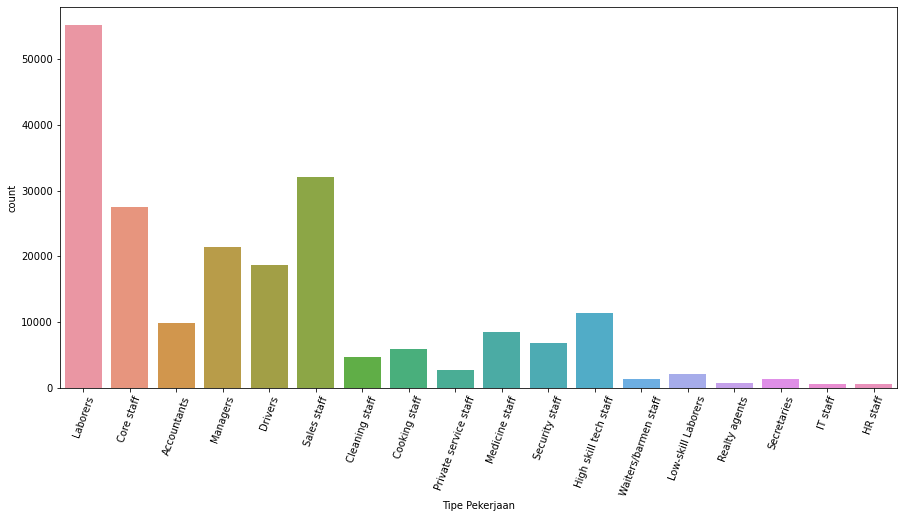

In [26]:
# Mengecek pekerjaan yang paling banyak meminjam kredit

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=df_apptrain)
plt.xlabel("Tipe Pekerjaan")
plt.xticks(rotation=70)

Peminjam terbanyak berasal dari pekerjaan Laborers (buruh), Peminjam tersedikit berasal dari HR Staff

Text(0, 0.5, 'Rata-rata Pendapatan Keluarga')

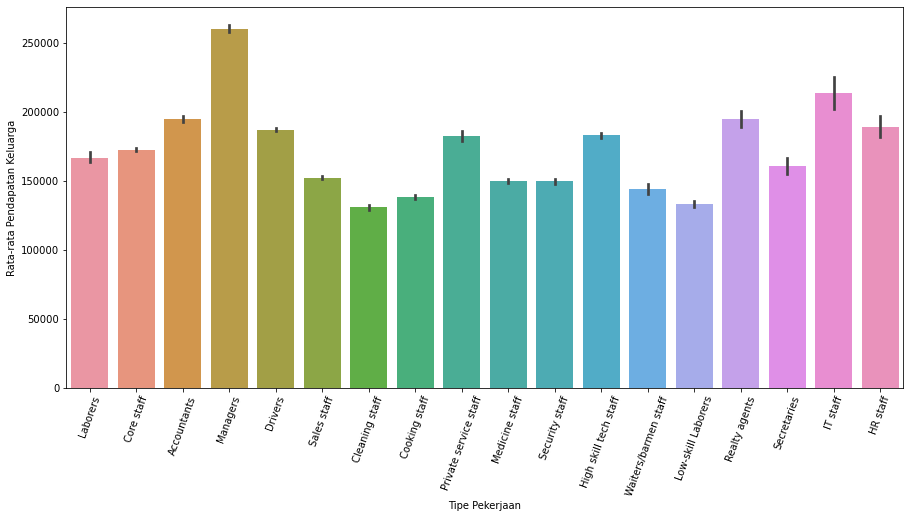

In [27]:
# Menghitung rata-rata pendapatan keluarga berdasarkan pekerjaan

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE' ,y='AMT_INCOME_TOTAL', data = df_apptrain)
plt.xticks(rotation=70)
plt.xlabel('Tipe Pekerjaan')
plt.ylabel('Rata-rata Pendapatan Keluarga')

Peminjam dengan pekerjaan manager memiliki pendapatan tertinggi, Peminjam dengan pekerjaan terendah adalah cleaning staf dan buruh ( Low-skill Laborers)

Text(0.5, 0, 'Tipe Pekerjaan')

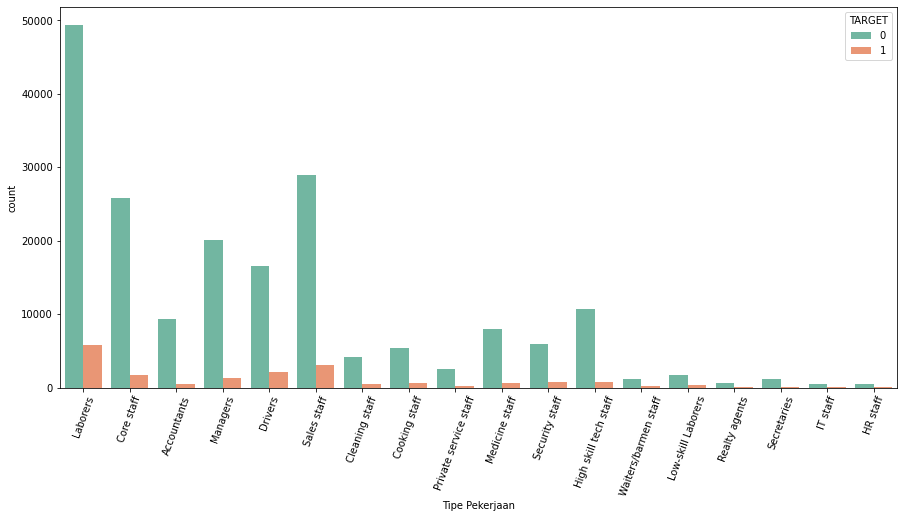

In [28]:
# Kategori pekerjaan mana yang membayar tepat waktu dan peminjam yang lebih baik bagi perusahaan untuk meminjamkan uang

fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE' , hue='TARGET', data=df_apptrain, palette='Set2')
plt.xticks(rotation=70)
plt.xlabel('Tipe Pekerjaan')

Pada grafik batang di atas, sepertinya para pekerja (laborers) memiliki kesulitan tertinggi dalam membayar kembali. Juga tampaknya meminjamkan ke agen Realitas, staf TI, staf SDM adalah yang paling aman.

Ini bukan cara yang lebih baik untuk menyimpulkan, karena ini berisi jumlah peminjam yang didasarkan.

Cara yang lebih baik adalah menemukan metrik yang menggabungkan hubungan relatif antara jumlah peminjam dan jumlah pembayar.

0: Pinjaman telah dilunasi 1: Pinjaman tidak dilunasi

In [29]:
# get the number of people having occupation type and target grouped.
Occupation = pd.DataFrame(data=df_apptrain.groupby(['OCCUPATION_TYPE','TARGET']).count()['SK_ID_CURR'])
Occupation

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0             9339
                      1              474
Cleaning staff        0             4206
                      1              447
Cooking staff         0             5325
                      1              621
Core staff            0            25832
                      1             1738
Drivers               0            16496
                      1             2107
HR staff              0              527
                      1               36
High skill tech staff 0            10679
                      1              701
IT staff              0              492
                      1               34
Laborers              0            49348
                      1             5838
Low-skill Laborers    0             1734
                      1              359
Managers              0            20043
                      1             1328
Medicine staff        0             7965
                      1              572
Private service staff 0             2477
                      1              175
Realty agents         0              692
                      1               59
Sales staff           0            29010
                      1             3092
Secretaries           0             1213
                      1               92
Security staff        0             5999
                      1              722
Waiters/barmen staff  0             1196
                      1              152

In [30]:
# reset the multiindex organization of dataframe.
Occupation = Occupation.reset_index() 
Occupation

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [31]:
# get the number of people grouped on type of occupation and target in an array form.
value_counts = Occupation['SK_ID_CURR'].values
value_counts

array([ 9339,   474,  4206,   447,  5325,   621, 25832,  1738, 16496,
        2107,   527,    36, 10679,   701,   492,    34, 49348,  5838,
        1734,   359, 20043,  1328,  7965,   572,  2477,   175,   692,
          59, 29010,  3092,  1213,    92,  5999,   722,  1196,   152],
      dtype=int64)

In [32]:
def repayers_to_applicants_ratio(values):
    flag = 1
    ratios = []
    for count in range(len(values)):
        if flag == 1:
            current_number = values[count]
            next_number = values[count+1]
            ratios.append(current_number/(current_number+next_number))
            ratios.append(current_number/(current_number+next_number))
        flag=flag*-1
    return ratios  

In [33]:
# find the ratios from the array values
Occupation['Ratio R/A'] = repayers_to_applicants_ratio(value_counts)

In [34]:
# get the ratio and values based on the order of saftety.

Occupation_ratio = Occupation.groupby(['OCCUPATION_TYPE','Ratio R/A']).count().drop(['TARGET', 'SK_ID_CURR'],axis=1)
Occupation_ratio = Occupation_ratio.reset_index() 
Occupation_ratio = Occupation_ratio.sort_values(['Ratio R/A'],ascending=False)
Occupation_ratio

,OCCUPATION_TYPE,Ratio R/A
0,Accountants,0.951697
6,High skill tech staff,0.938401
10,Managers,0.937860
3,Core staff,0.936960
5,HR staff,0.936057
7,IT staff,0.935361
12,Private service staff,0.934012
11,Medicine staff,0.932998
15,Secretaries,0.929502
13,Realty agents,0.921438


Text(0, 0.5, 'Mean R/A Ratio')

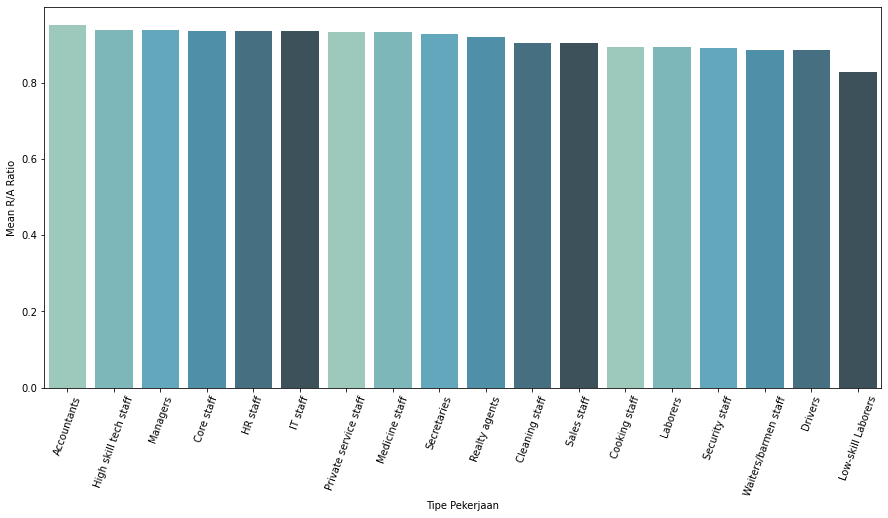

In [35]:
# Occupation type and occupation based repayment to applicants ratio.

fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(x='OCCUPATION_TYPE',y='Ratio R/A',data=Occupation_ratio,palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Tipe Pekerjaan")
plt.ylabel("Mean R/A Ratio")

Berdasarkan rasio jumlah pembayar dengan jumlah peminjam di setiap jenis pekerjaan, terlihat bahwa paling aman untuk meminjamkan uang kepada peminjam yang bekerja sebagai Akuntan (Accountants) dengan rasio R/A 0,9516 dan paling tidak aman untuk meminjamkan uang kepada pekerja berketerampilan rendah (low-skill laborers) dengan rasio R/A 0,8284

In [36]:
# bagaimana distribusi laki-laki dan perempuan dalam hal keamanan pinjaman mengingat bahwa mereka termasuk dalam pekerjaan tertentu?

df_apptrain = pd.merge(left=df_apptrain,right=Occupation_ratio,on='OCCUPATION_TYPE')
df_apptrain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.894212
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.894212
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.894212
4,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.894212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211115,454388,0,Cash loans,F,N,Y,1,225000.0,491823.0,25240.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.936057
211116,454756,0,Revolving loans,F,N,N,0,81000.0,180000.0,9000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.936057
211117,455325,0,Cash loans,F,N,Y,0,162000.0,450000.0,14373.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0,0.936057
211118,455602,0,Cash loans,M,N,Y,1,292500.0,536917.5,30109.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.936057


Text(0.5, 0, 'Gender')

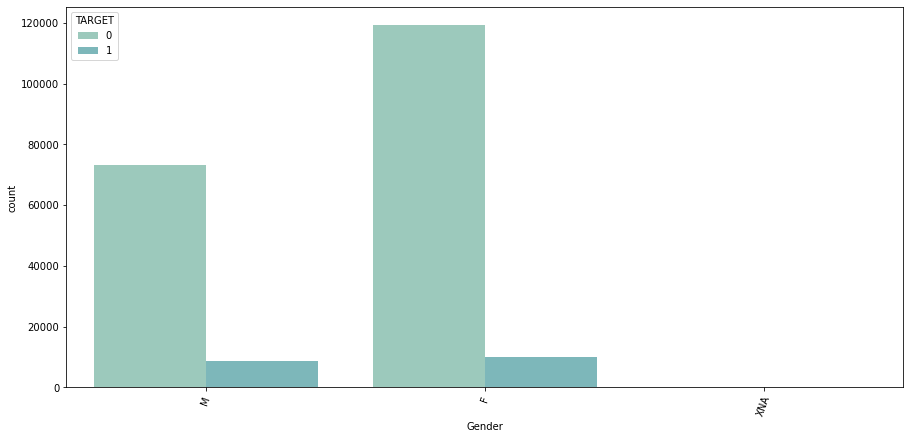

In [37]:
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot(x='CODE_GENDER',data=df_apptrain,hue='TARGET',palette=sns.color_palette("GnBu_d"))
plt.xticks(rotation=70)
plt.xlabel("Gender")

In [38]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.

prob = pd.DataFrame(df_apptrain.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index() 
print(prob)
print('')

print("probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952") 
print("probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228")

  CODE_GENDER  TARGET  SK_ID_CURR
0           F       0      119311
1           F       1        9971
2           M       0       73260
3           M       1        8576
4         XNA       0           2

probability that an applicant will repay the given that he is a male P(R|M): 73260/(73260+8576) = 0.8952
probability that an applicant will repay the given that she is a female P(R|F): 119311/(119311+9971) = 0.9228


In [39]:
# Let us create a new dataframe where the probabilites of repaying based on gender is included. GR/A stands
# for Gender based repayment ratio.

gender_repay_ratio = pd.DataFrame({"CODE_GENDER":['M','F'],"GR/A":[0.8952,0.9228]})
gender_repay_ratio 

,CODE_GENDER,GR/A
0,M,0.8952
1,F,0.9228


In [40]:
# Merge this dataframe with the old train dataframe

df_apptrain = pd.merge(left=df_apptrain,right=gender_repay_ratio,on='CODE_GENDER')
df_apptrain
     

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Ratio R/A,GR/A
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.894212,0.8952
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.894212,0.8952
3,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.894212,0.8952
4,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.894212,0.8952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,453306,0,Revolving loans,F,Y,N,0,81000.0,180000.0,9000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.9228
211114,453456,0,Cash loans,F,N,N,0,135000.0,675000.0,17937.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.9228
211115,454388,0,Cash loans,F,N,Y,1,225000.0,491823.0,25240.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.936057,0.9228
211116,454756,0,Revolving loans,F,N,N,0,81000.0,180000.0,9000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.936057,0.9228


In [41]:
# lets create a new column that's indicative of repayment with gender and occupation type which is just the product of Ratio R/A with G R/A.
# EGR/A stands for employment gender repayment ratio.

df_apptrain['EGR/A'] = df_apptrain['Ratio R/A']*df_apptrain['GR/A']

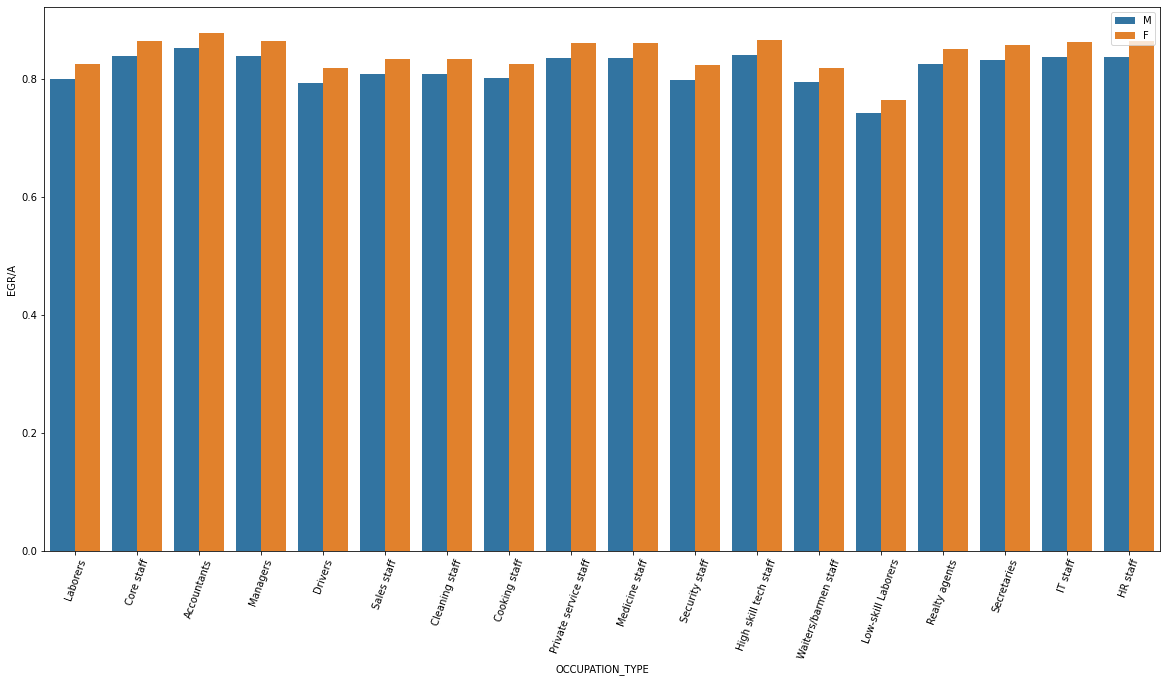

In [42]:
fig,ax = plt.subplots(figsize = (20,10))
plt.xticks(rotation=70)
sns.barplot(x='OCCUPATION_TYPE',y='EGR/A',hue='CODE_GENDER',data=df_apptrain)
plt.legend(loc=1)

terlihat pada grafik di atas, perempuan pada tipe pekerjaan lebih mungkin membayar kembali pinjaman mereka tepat waktu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

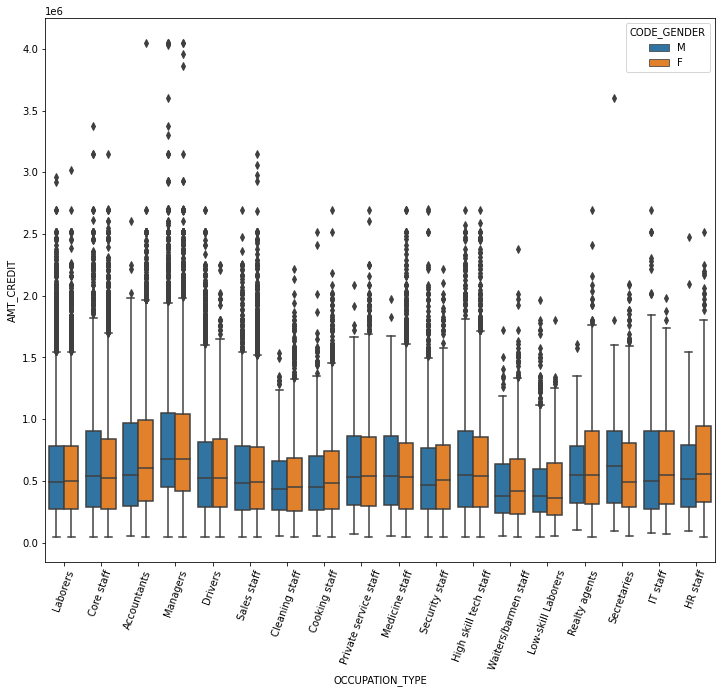

In [43]:
# kategori pekerjaan mana yang merupakan penerima pinjaman tertinggi?

plt.figure(figsize=(12,10))
sns.boxplot(x='OCCUPATION_TYPE',y='AMT_CREDIT',data=df_apptrain,hue='CODE_GENDER')
plt.xticks(rotation=70)
     

Akuntan (accountants) dan manajer (managers) adalah penerima jumlah tertinggi, sementara pekerja berketerampilan rendah (low-skill laborers) adalah penerima paling sedikit (biar saya jelaskan - pekerja adalah pelamar berdasarkan volume tertinggi, tetapi bukan penerima besar).

masuk akal karena akuntan (accountants) lebih mungkin untuk mendapatkan kredit besar yang disetujui dibandingkan dengan pekerja terampil rendah (low-skill laborers) - yang agak dijelaskan melalui Rasio R/A, didukung dengan kekuatan pendapatan atau income yang didapat.

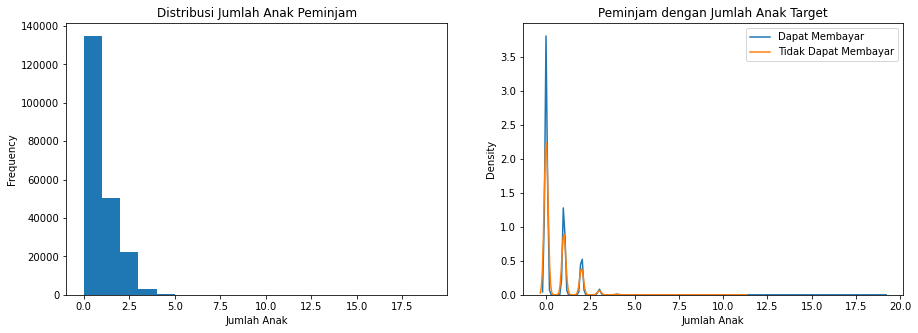

In [44]:
# lalu apakah jumlah anak klien mempengaruhi kemampuan membayar?

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df_apptrain['CNT_CHILDREN'].plot(kind='hist', bins=19, title="Distribusi Jumlah Anak Peminjam")
plt.xlabel("Jumlah Anak")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.distplot(df_apptrain[df_apptrain['TARGET']==0]['CNT_CHILDREN'], hist=False, label="Dapat Membayar")
sns.distplot(df_apptrain[df_apptrain['TARGET']==1]['CNT_CHILDREN'], hist=False, label="Tidak Dapat Membayar")
plt.title("Peminjam dengan Jumlah Anak Target")
plt.xlabel("Jumlah Anak")
plt.legend()
plt.show()

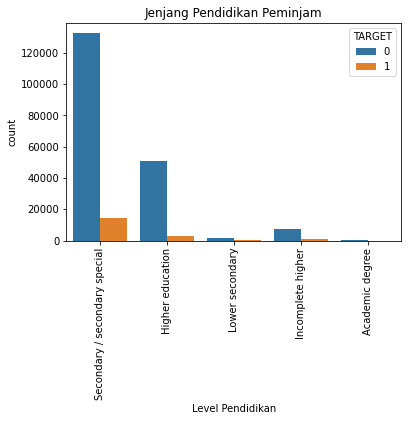

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            105
                               1              2
Higher education               0          51138
                               1           2998
Incomplete higher              0           7220
                               1            691
Lower secondary                0           1638
                               1            271
Secondary / secondary special  0         132470
                               1          14585
Name: TARGET, dtype: int64

In [45]:
# jenjang pendidikan terbanyak yang dimiliki oleh peminjam?

ax = sns.countplot(data=df_apptrain, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title("Jenjang Pendidikan Peminjam")
plt.xlabel("Level Pendidikan")
plt.show()

print('\n'*2)
df_apptrain.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

pada grafik di atas, jenjang pendidikan terbanyak ialah tingkat secondary, dan sekitar 98% peminjam dengan jenjang pendidikan yang tinggi dapat membayar pinjaman mereka.

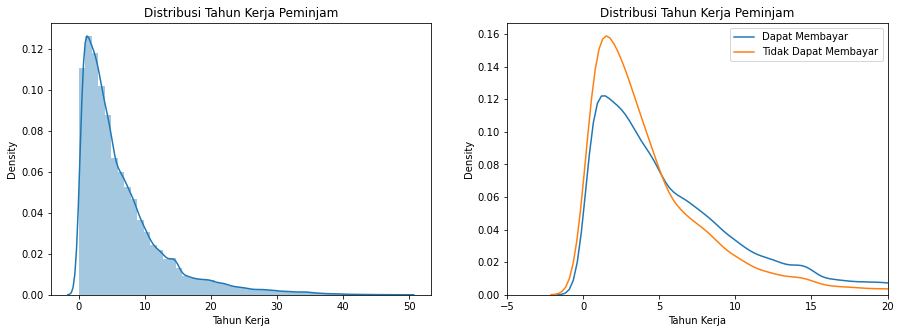

In [46]:
# apakah ada hubungan antara tahun berapa lama bekerja dan kemampuan membayar?

proper_days_empolyed_df = df_apptrain[df_apptrain['DAYS_EMPLOYED']!=365243]
proper_days_empolyed_df['YEARS_EMPLOYED'] = proper_days_empolyed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_empolyed_df['YEARS_EMPLOYED'])
plt.title("Distribusi Tahun Kerja Peminjam")
plt.xlabel("Tahun Kerja")

plt.subplot(1, 2, 2)
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label="Dapat Membayar")
sns.distplot(proper_days_empolyed_df[proper_days_empolyed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label="Tidak Dapat Membayar")
plt.title("Distribusi Tahun Kerja Peminjam")
plt.xlim([-5,20])
plt.xlabel("Tahun Kerja")
plt.legend()

peminjam dengan masa kerja kurang dari 5 tahun cenderung mengajukan pinjaman lebih, dan mereka cenderung tidak membayar, terutama kurang dari 2 tahun, sebaliknya.

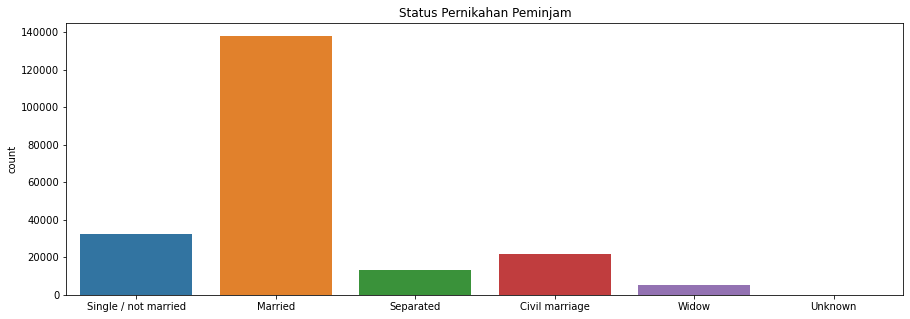

In [47]:
# bagaimana dengan status pernikahan peminjam?

plt.figure(figsize=(15,5))
sns.countplot(df_apptrain.NAME_FAMILY_STATUS.values,data=df_apptrain)
plt.title("Status Pernikahan Peminjam")
plt.show()

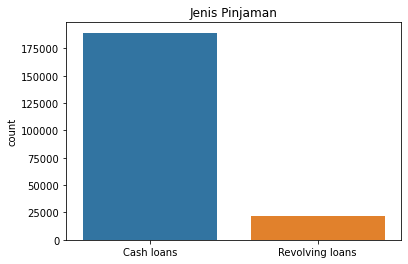

In [48]:
# jenis kredit pinjaman yang paling sering diminta oleh peminjam

sns.countplot(df_apptrain.NAME_CONTRACT_TYPE.values,data=df_apptrain)
plt.title("Jenis Pinjaman")
plt.show()

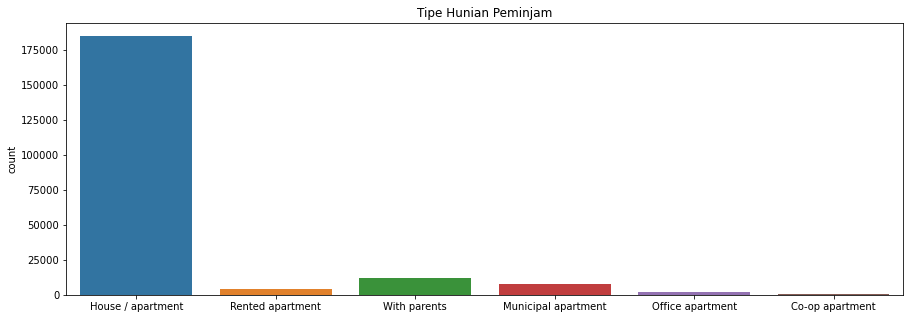

In [49]:
# tipe rumah paling banyak yang ditempati oleh peminjam?

plt.figure(figsize=(15,5))
sns.countplot(df_apptrain.NAME_HOUSING_TYPE.values,data=df_apptrain)
plt.title("Tipe Hunian Peminjam")
plt.show()

In [50]:
# Mengecek data bureau

print(f' Train set shape:{df_bureau.shape}')
df_bureau.head()

 Train set shape:(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [51]:
# Mengecek data bureau balance

print(f' Train set shape:{df_bureauba.shape}')
df_bureauba.head()

 Train set shape:(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [52]:
# Mengecek data credit card balance

print(f' Train set shape:{df_ccbalance.shape}')
df_ccbalance.head()

 Train set shape:(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [53]:
# Mengecek data installment payments

print(f' Train set shape:{df_inspay.shape}')
df_inspay.head()

 Train set shape:(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [54]:
# Mengecek data POS Cash balance

print(f' Train set shape:{df_poscash.shape}')
df_poscash.head()

 Train set shape:(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [55]:
# Mengecek data Previous Application

print(f' Train set shape:{df_bureauba.shape}')
df_previous_app.head()

 Train set shape:(27299925, 3)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Missing Data #

In [56]:
# Function to calculate missing values by column

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        


        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df_apptrain)
missing_values.head(20)

Your selected dataframe has 125 columns.
There are 65 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,147666,69.9
COMMONAREA_AVG,147666,69.9
COMMONAREA_MODE,147666,69.9
NONLIVINGAPARTMENTS_MEDI,146756,69.5
NONLIVINGAPARTMENTS_MODE,146756,69.5
NONLIVINGAPARTMENTS_AVG,146756,69.5
FONDKAPREMONT_MODE,144471,68.4
LIVINGAPARTMENTS_MODE,144455,68.4
LIVINGAPARTMENTS_MEDI,144455,68.4
LIVINGAPARTMENTS_AVG,144455,68.4


In [57]:
# all NaNs
print(f'Total training NaNs = {df_apptrain.isnull().sum().sum()}')
print(f'Total Testing NaNs = {df_apptest.isnull().sum().sum()}')

Total training NaNs = 6202197
Total Testing NaNs = 1404419


In [58]:
# Only columns with NaNs count and percentage
columns = df_apptrain.isnull().sum()[df_apptrain.isnull().sum() != 0].keys()
nans_count = df_apptrain.isnull().sum()[df_apptrain.isnull().sum() != 0].values
nans_percentage = df_apptrain.isnull().sum()[df_apptrain.isnull().sum() != 0].values/df_apptrain.shape[0]

# create a dataframe from the extracted info. 
nans = pd.DataFrame({'Column':columns, 'No. of NaNs':nans_count, '% of NaNs in Column':nans_percentage*100})
nans = nans.sort_values(by='% of NaNs in Column', ascending=False)
nans

,Column,No. of NaNs,% of NaNs in Column
40,COMMONAREA_MEDI,147666,69.944770
12,COMMONAREA_AVG,147666,69.944770
26,COMMONAREA_MODE,147666,69.944770
48,NONLIVINGAPARTMENTS_MEDI,146756,69.513732
34,NONLIVINGAPARTMENTS_MODE,146756,69.513732
...,...,...,...
55,OBS_30_CNT_SOCIAL_CIRCLE,696,0.329673
6,EXT_SOURCE_2,412,0.195152
1,AMT_GOODS_PRICE,221,0.104681
0,AMT_ANNUITY,12,0.005684


In [59]:
# checking missing app train data
total = df_apptrain.isnull().sum().sort_values(ascending = False)
percent = (df_apptrain.isnull().sum()/df_apptrain.isnull().count()*100).sort_values(ascending = False)
missing_app_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_app_train_data.head(20)

,Total,Percent
COMMONAREA_MODE,147666,69.944770
COMMONAREA_AVG,147666,69.944770
COMMONAREA_MEDI,147666,69.944770
NONLIVINGAPARTMENTS_MEDI,146756,69.513732
NONLIVINGAPARTMENTS_AVG,146756,69.513732
NONLIVINGAPARTMENTS_MODE,146756,69.513732
FONDKAPREMONT_MODE,144471,68.431399
LIVINGAPARTMENTS_MEDI,144455,68.423820
LIVINGAPARTMENTS_AVG,144455,68.423820
LIVINGAPARTMENTS_MODE,144455,68.423820


# Data Cleansing and Data Preprocessing #

In [60]:
# before start cleaning, we keep copy of datasets

df_apptrain_copy = df_apptrain.copy()
df_apptest_copy = df_apptest.copy()

In [66]:
# check the new datasets shapes
print(df_apptrain.shape)
print(df_apptest.shape)

(211118, 76)
(48744, 121)


In [67]:
# Drop XNA records from CODE_GENDER column
# extract all records doesn't have XNA value in CODE_GENDER column
df_apptrain = df_apptrain[df_apptrain['CODE_GENDER']!='XNA']

# check
df_apptrain['CODE_GENDER'].value_counts()

F    129282
M     81836
Name: CODE_GENDER, dtype: int64

In [69]:
#Drop the wrong value in AMT_INCOME_TOTAL column

df_apptrain = df_apptrain[df_apptrain['AMT_INCOME_TOTAL'] != 117000000.0]

In [70]:
#Change the wrong value in DAYS_EMPLOYED and DAYS_LAST_PHONE_CHANGE columns

# DAYS_EMPLOYED column

df_apptrain['DAYS_EMPLOYED'] = df_apptrain['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)
df_apptest['DAYS_EMPLOYED'] = df_apptest['DAYS_EMPLOYED'].apply(lambda x: np.nan if x==365243 else x)

In [71]:
print(df_apptrain['DAYS_EMPLOYED'].max())
print(df_apptest['DAYS_EMPLOYED'].max())

0.0
-1.0


In [73]:
# DAYS_LAST_PHONE_CHANGE column
df_apptrain['DAYS_LAST_PHONE_CHANGE'] = df_apptrain['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)
df_apptest['DAYS_LAST_PHONE_CHANGE'] = df_apptest['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: np.nan if x==0.0 else x)

# check
print(df_apptrain['DAYS_LAST_PHONE_CHANGE'].max())
print(df_apptest['DAYS_LAST_PHONE_CHANGE'].max())

-1.0
-1.0


NaNs Imputation

Catagorical Features Encoding

Istead of doing both label encoding for features with 2 unique catagories and one hot encoding for the rest, we can do one hot encoding for all features with and drop the first outcome column, as:

it will do it for us in one step

decrease the No. of features to prevent increasing dimensions and prevent overfitting

MinMax Scaling

get rid of the outliers

create one pipeline that impute NaNs with respect to columns dtype and then do One-Hot Encoding and Normalization

we will use this pipeline in modelling stage.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# create a pipeline to deal with numerical features

numeric_transformer = Pipeline(
    steps=[("num_imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)
     

In [76]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a pipeline to deal with catagorical features

categorical_transformer = Pipeline(
    steps=[("cat_imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder(handle_unknown='ignore', drop='first'))]
)
  

In [77]:
from sklearn.compose import ColumnTransformer, make_column_selector

# create a column transformer instant

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude="object")),
        ("cat", categorical_transformer, make_column_selector(dtype_include="object")),
    ]
)

In [79]:
# separate target out of features "predictors"

X = df_apptrain.drop('TARGET', axis=1)
y = df_apptrain['TARGET']

## Training Data ##

In [80]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

## Model Machine Learning ##

### Logistic Regression ###

In [81]:
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.973333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.966000 (0.018726) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967000 (0.018824) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.968000 (0.019044) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.966000 (0.020100) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966000 (0.020100) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.968000 (0.019044) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.966333 (0.020572) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966333 (0.020572) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.968000 (0.019562) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.967667 (0.019947) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967667 (0.019947) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.969667 (0.019576) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.972333 (0.017452) wi

### Random Forest ###

In [82]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# create a function for trained models evaluation
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_train)
    test_pred = model_pipeline.predict(X_test)
    
    train_pred_proba = model_pipeline.predict_proba(X_train)
    test_pred_proba = model_pipeline.predict_proba(X_test)

### Predicting ###

In [83]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [85]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

